Exercice 1 - Visualisation des notes des étudiants :

a) Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".

b) Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.

Exercice 2 - Comparaison des notes en fonction des salles :

a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.

Exercice 3 - Comparaison des notes en fonction du statut de réussite :

a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.

Exercice 4 - Visualisation de la corrélation entre les variables :

a) Chargez le fichier "titanic.csv" dans un DataFrame nommé "titanic_df".

b) Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame "titanic_df".

Exercice 5 - Comparaison des tarifs en fonction du statut de survie :

a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte (boxplot) montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survécu ou non).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
grades_df = pd.read_csv("student_grades.csv")
grades_df

,401767594,4,C
0,401767594,3,B-
1,678665086,4,A+
2,678665086,3,A+
3,553725811,2,C
4,678665086,1,B
5,886308195,1,A
6,103066521,2,C
7,103066521,3,C-
8,821568627,4,D
9,821568627,2,A+


In [4]:
grades_df.columns = ["id", "salles", "notes"]
grades_df

,id,salles,notes
0,401767594,3,B-
1,678665086,4,A+
2,678665086,3,A+
3,553725811,2,C
4,678665086,1,B
5,886308195,1,A
6,103066521,2,C
7,103066521,3,C-
8,821568627,4,D
9,821568627,2,A+


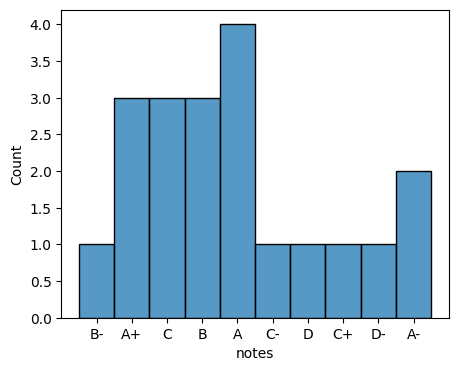

In [5]:
plt.subplots(figsize=(5, 4))
ax = sns.histplot(grades_df["notes"])

In [6]:
note_lettre = [chr(ord('E') - i) + ('-' if (x + 2) == 2 else '+' if (x + 2) == 4 else "") for i in range(5) for x in range(3)]
note_nombre = np.arange(18)
note_lettre_nombre = {}
for lettre, nombre in zip(note_lettre, note_nombre):
        note_lettre_nombre[lettre] = nombre 
grades_df["note_dec"] = grades_df["notes"].map(note_lettre_nombre)

In [7]:
def convert_to_0_20(liste):
    return round(liste * (20/14), 1)

In [8]:
grades_df.note_dec = convert_to_0_20(grades_df["note_dec"])
grades_df["result"] = np.where(grades_df["note_dec"] >= 10, "Success", "Fail")
grades_df

,id,salles,notes,note_dec,result
0,401767594,3,B-,12.9,Success
1,678665086,4,A+,20.0,Success
2,678665086,3,A+,20.0,Success
3,553725811,2,C,10.0,Success
4,678665086,1,B,14.3,Success
5,886308195,1,A,18.6,Success
6,103066521,2,C,10.0,Success
7,103066521,3,C-,8.6,Fail
8,821568627,4,D,5.7,Fail
9,821568627,2,A+,20.0,Success


In [9]:
notes_moy_salles = grades_df.groupby("salles")["note_dec"].mean()
notes_moy_salles

salles
1    15.716667
2    13.471429
3    12.875000
4    14.766667
Name: note_dec, dtype: float64

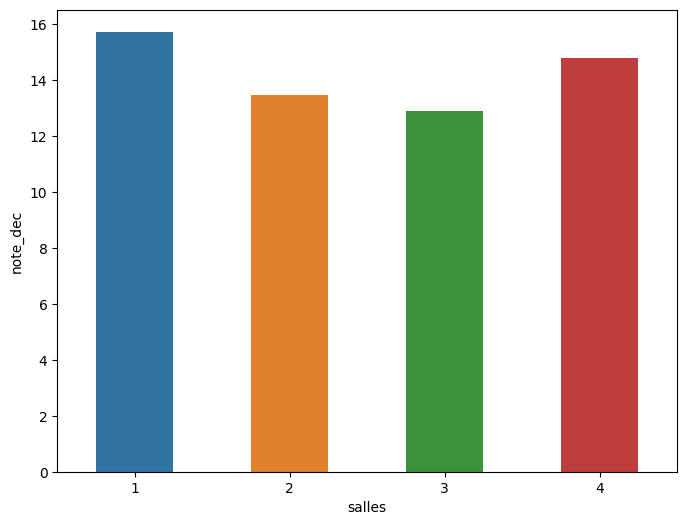

In [10]:
plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=notes_moy_salles.keys(), y=notes_moy_salles, width=0.5)

In [11]:
nombre_etudiant_resultat = grades_df.groupby("result")["result"].count()
nombre_etudiant_resultat

result
Fail        3
Success    17
Name: result, dtype: int64

[Text(0, 0.5, 'number')]

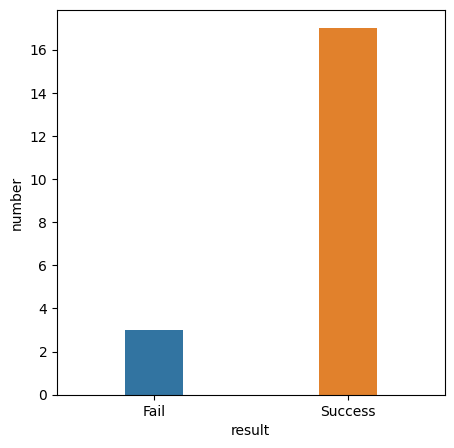

In [12]:
plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=nombre_etudiant_resultat.keys(), y=nombre_etudiant_resultat, width=0.3)
ax.set(ylabel="number")

In [13]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
corr_mat = titanic_df[["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


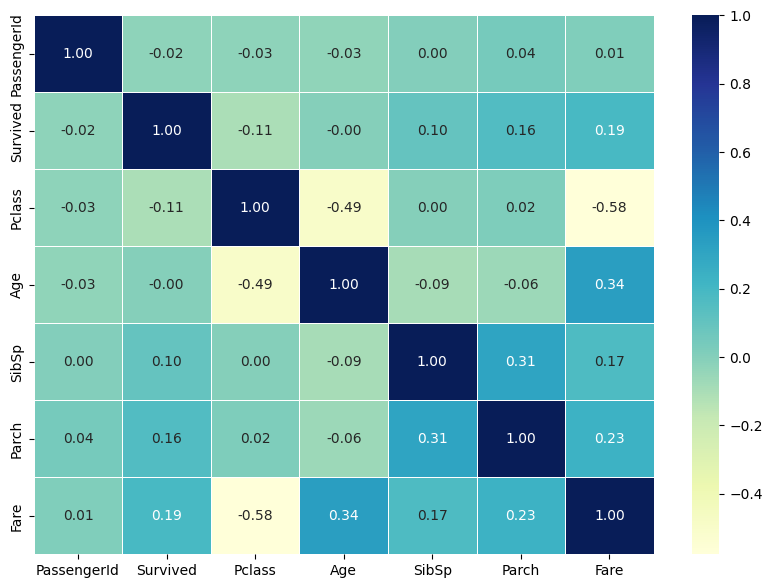

In [15]:
plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap="YlGnBu")

On voit peu de corrélation, la plus forte étant la classe qui diminue lorsque le tarif augmente ce qui parait logique.

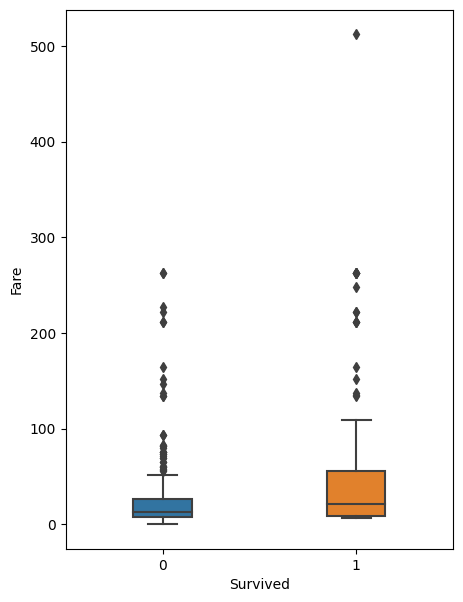

In [16]:
plt.subplots(figsize=(5, 7))
ax = sns.boxplot(x=titanic_df.Survived, y=titanic_df.Fare, width=0.3)

On voit que ce qui sont morts avaient une fourchettre de tarif moins étendues que ceux qui ont survécu. Une médiane, premier quartile un peu plus bas mais surtout un troisième quartile et un maximum beaucoup plus bas.

Exercice 15 - Comparaison des tarifs des passagers en fonction du port d'embarquement :

a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).

Exercice 16 - Visualisation de la répartition des tarifs des passagers :

a) Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des tarifs payés par les passagers.

Exercice 17 - Comparaison des tarifs des passagers en fonction du sexe :

a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du sexe (homme ou femme).

Exercice 18 - Visualisation des tarifs des passagers en fonction du statut de survie :

a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survécu ou non).

Exercice 19 - Comparaison des âges des passagers en fonction du port d'embarquement :

a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction du port d'embarquement.

Exercice 20 - Visualisation de la répartition des âges des passagers :

a) Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des âges des passagers.

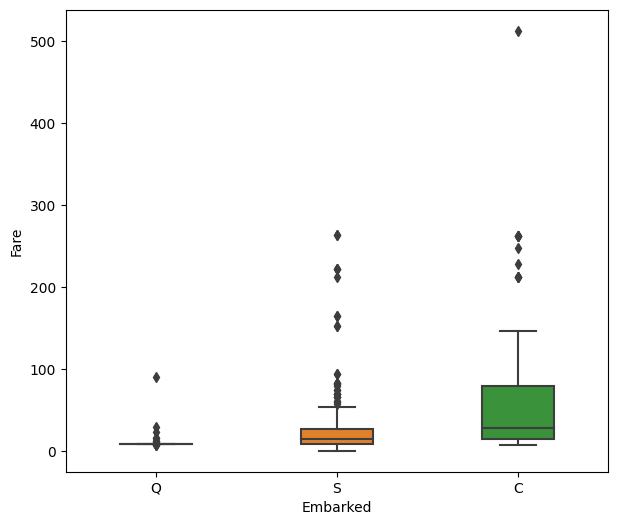

In [26]:
plt.subplots(figsize=(7,6))
ax = sns.boxplot(x=titanic_df.Embarked, y=titanic_df.Fare, width=0.4)

On remarque que la fourchette de tarifs est plus large pour le port de Cherbourg que pour les deux autres et quasi nulle pour le port de Queenstown. 
On remarque également que les tarifs sont bien plus élevés à Cherbourg de l'ordre de 10 fois supérieur que pour Queenstown et plus de trois que pour Southampton.

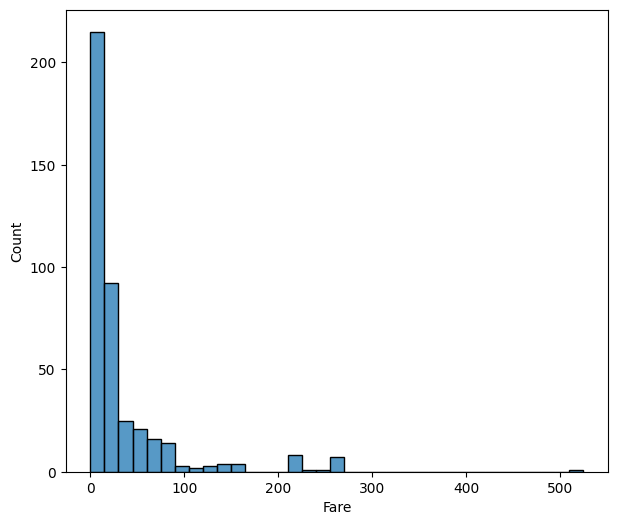

In [47]:
plt.subplots(figsize=(7,6))
ax = sns.histplot(titanic_df.Fare, binwidth=15)


On remarque que la grande majorité des billets (plus de 160), a un tarif compris entre 0 et 10 dollars, environ 90 entre  10 et 20 dollars, environ 55 entre 20 et 30 dollars et moins de 20 pour chaque fourchettes de tarifs supérieurs

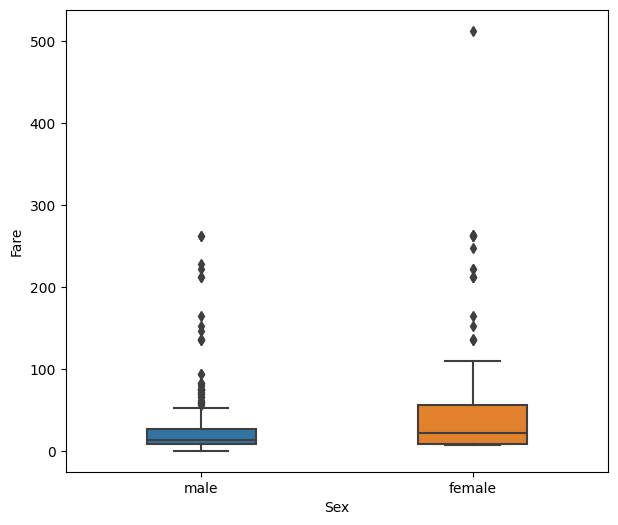

In [42]:
plt.subplots(figsize=(7,6))
ax = sns.boxplot(x=titanic_df.Sex, y=titanic_df.Fare, width=0.4)

Il existe moins de variations de tarifs entre les hommes qu'entre les femmes et que ces dernière paient majoritairement plus chères que les hommes.

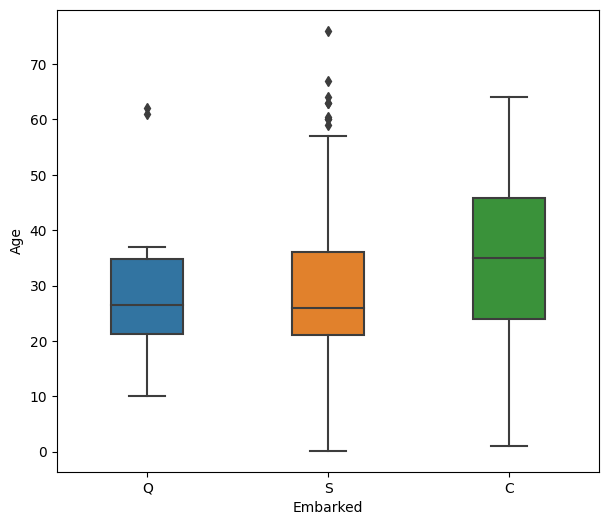

In [44]:
plt.subplots(figsize=(7,6))
ax = sns.boxplot(x=titanic_df.Embarked, y=titanic_df.Age, width=0.4)

On voit que les âges varient de 10 à 38 ans pour le port de Queenstown avec plus de la moitié ayant moins de 30 ans.
Les âges varient de 0 à 58 ans pour le port de Southampton avec plus de la moitié ayant moins de 30 ans.
Les âges varient de 0 à 65 ans pour le port de Southampton avec plus de la moitié ayant moins de 35 ans.

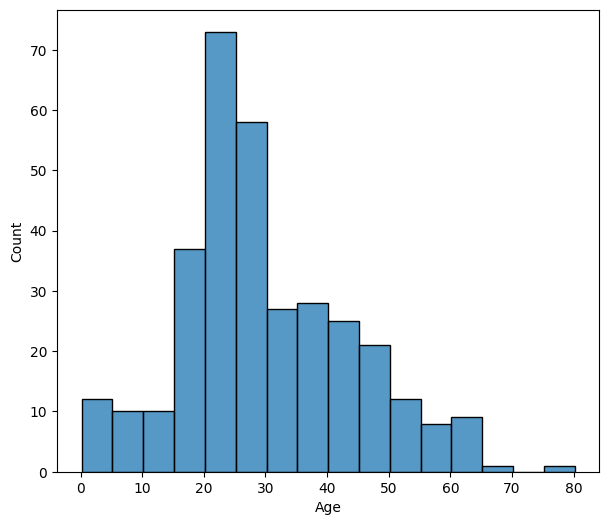

In [46]:
plt.subplots(figsize=(7,6))
ax = sns.histplot(titanic_df.Age, binwidth=5)

On voit que la majorité des passagers à entre 15 et 40 ans, les 20-25 ans étant la tranche d'âge la plus représentée

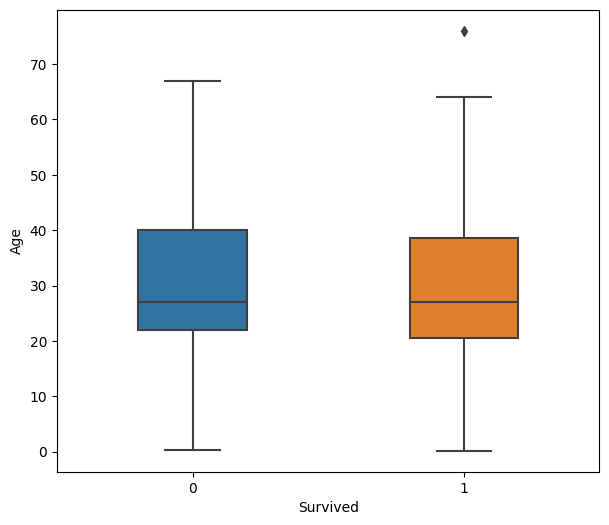

In [52]:
plt.subplots(figsize=(7,6))
ax = sns.boxplot(x=titanic_df.Survived, y=titanic_df.Age, width=0.4)